
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [4]:

import numpy as np
import matplotlib.pyplot as plt


In [1]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
#compute mean, std and then x(scaled)=(x-mean)/std
class StandardScalerManual:
    def fit(self, X):
        #Compute mean and std for each feature

        # Mean of each feature
        self.mean_ = np.mean(X, axis=0)

        # Std of each feature (add small epsilon to avoid division by zero)
        self.std_ = np.std(X, axis=0) + 1e-8

    def transform(self, X):
         return (X - self.mean_) / self.std_

    def fit_transform(self, X):
      #fit on x and return x scaled/transformed
        self.fit(X)
        return self.transform(X)


In [2]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        # lr=learning rate
        # epochs=number of gradient descent steps
        # l2_lambda=regularization strength (Ridge)
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        #train the linear regression model using gradient descent
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            # Forward pass
            y_pred = X @ self.w + self.b #Multiply each feature by its weight, add them up and then add b

            # Compute loss
            mse = np.mean((y - y_pred) ** 2)
            l2_penalty = self.l2_lambda * np.sum(self.w ** 2)
            loss = mse + l2_penalty
            self.losses.append(loss)

            # Gradients
            dw = (-2 / n_samples) * (X.T @ (y - y_pred)) + 2 * self.l2_lambda * self.w
            db = (-2 / n_samples) * np.sum(y - y_pred)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b


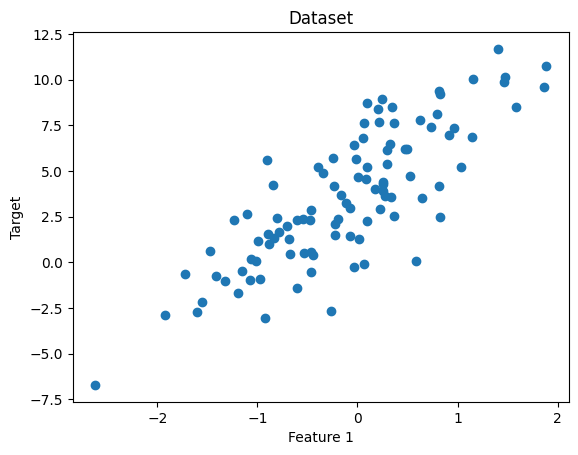

In [ ]:
#generating dataset using numpy
np.random.seed(42)

n_samples = 100
n_features = 2

X = np.random.randn(n_samples, n_features)

true_w = np.array([3.5, -2.0])
true_b = 4.0

noise = np.random.randn(n_samples) * 0.5
y = X @ true_w + true_b + noise

plt.scatter(X[:, 0], y)
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Dataset")
plt.show()

In [7]:
#Training with and without standardization
#Training w/o standardization
model_no_scaling = LinearRegressionManual(
    lr=0.01,
    epochs=1000,
    l2_lambda=0.0
)

model_no_scaling.fit(X, y)

#Training with standardization
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model_scaled = LinearRegressionManual(
    lr=0.01,
    epochs=1000,
    l2_lambda=0.0
)

model_scaled.fit(X_scaled, y)

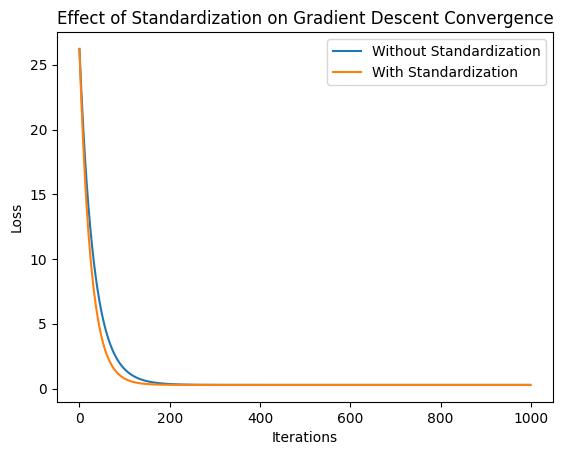

In [8]:
#Convergence comparison
plt.figure()
plt.plot(model_no_scaling.losses, label="Without Standardization")
plt.plot(model_scaled.losses, label="With Standardization")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Effect of Standardization on Gradient Descent Convergence")
plt.legend()
plt.show()
#Standardization leads to slightly faster and smoother convergence.
#Difference for this dataset is not that pronounced because there are only 2 features and also the values of the features dont vary by a lot

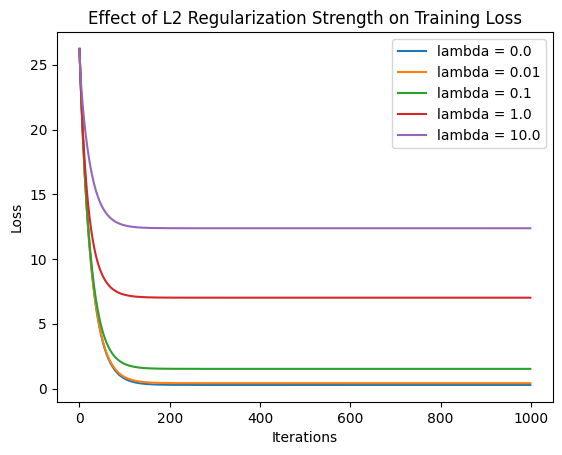

In [9]:
#Try different values for regularization strengths
lambdas = [0.0, 0.01, 0.1, 1.0, 10.0]

plt.figure()

for l in lambdas:
    model = LinearRegressionManual(
        lr=0.01,
        epochs=1000,
        l2_lambda=l
    )
    model.fit(X_scaled, y)
    plt.plot(model.losses, label=f"lambda = {l}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Effect of L2 Regularization Strength on Training Loss")
plt.legend()
plt.show()
#as lambda increases from 0 to greater values model moves from overfitting to underfitting
#with greater lambda loss value increases

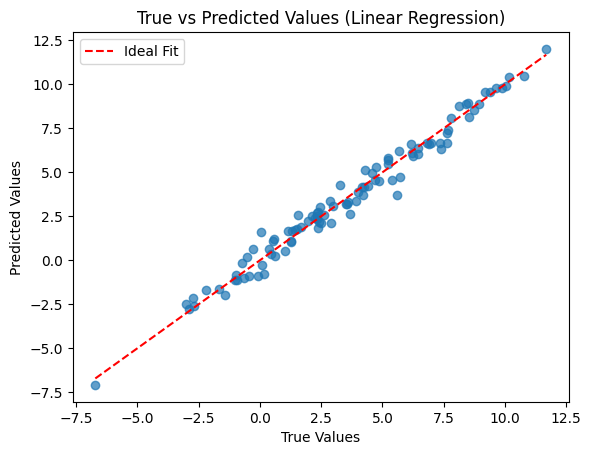

In [11]:
#True vs predicted plot
y_pred = model_scaled.predict(X_scaled)

plt.figure()
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Linear Regression)")
plt.legend()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [12]:

#Implement sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [13]:

class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            # Linear combination
            z = X @ self.w + self.b

            # Apply sigmoid
            y_hat = sigmoid(z)

            # Compute Binary Cross Entropy loss
            bce = -np.mean(
                y * np.log(y_hat + 1e-8) +
                (1 - y) * np.log(1 - y_hat + 1e-8)
            )

            # Add L2 penalty
            loss = bce + self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

            # Gradients
            dw = (1 / n_samples) * (X.T @ (y_hat - y)) + 2 * self.l2_lambda * self.w
            db = (1 / n_samples) * np.sum(y_hat - y)

            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        z = X @ self.w + self.b
        return sigmoid(z)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


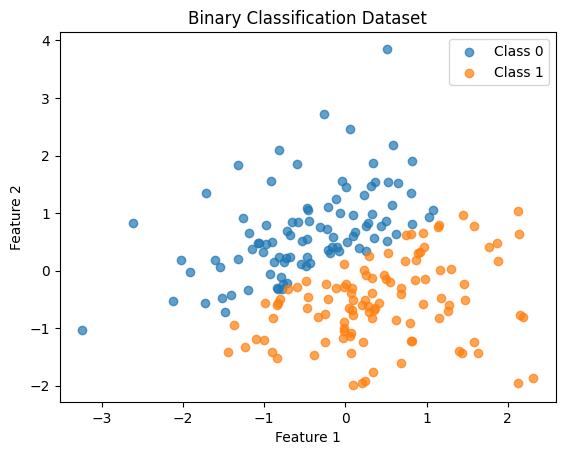

In [14]:
#creating a binary classification dataset
np.random.seed(42)

n_samples = 200
n_features = 2

# Generate features
X = np.random.randn(n_samples, n_features)

# True parameters
true_w = np.array([2.0, -3.0])
true_b = 0.5

# Linear combination + sigmoid to generate probabilities
z = X @ true_w + true_b
probs = 1 / (1 + np.exp(-z))

# Generate binary labels
y = (probs >= 0.5).astype(int)

plt.figure()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.7)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary Classification Dataset")
plt.legend()
plt.show()

In [15]:
#standardize features (will be using previous code only)
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

##Training loss curve

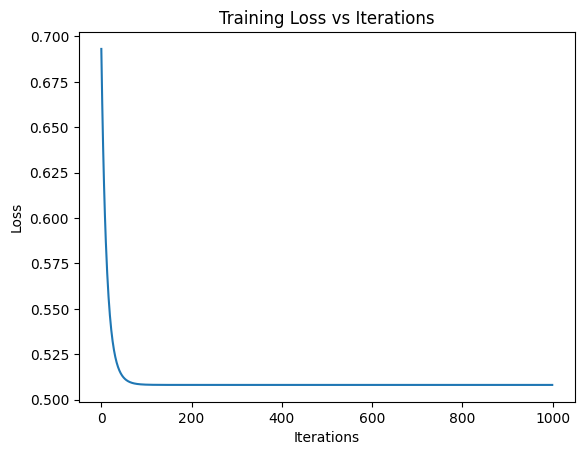

In [17]:
#Train the model
model = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.1
)

model.fit(X_scaled, y)

#plot training loss curve
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss vs Iterations")
plt.show()

##Final accuracy

In [18]:
#calculate accuracy
y_pred = model.predict(X_scaled)

accuracy = np.mean(y_pred == y)
accuracy

np.float64(0.98)

##Bonus part

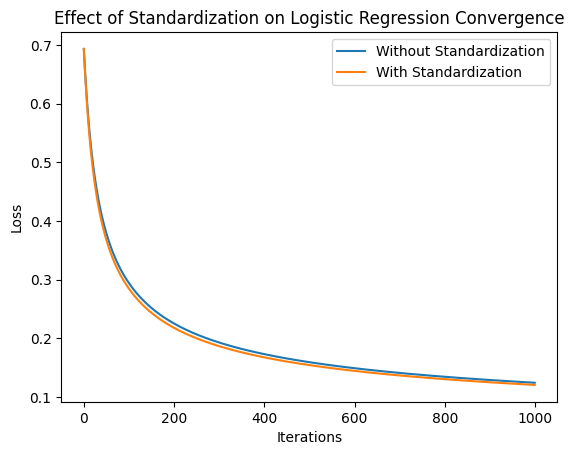

In [19]:
#Train with and without standardization
#w/o standardization
model_log_no_scaling = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.0
)
model_log_no_scaling.fit(X, y)
#with standardization
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model_log_scaled = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.0
)
model_log_scaled.fit(X_scaled, y)

plt.figure()
plt.plot(model_log_no_scaling.losses, label="Without Standardization")
plt.plot(model_log_scaled.losses, label="With Standardization")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Effect of Standardization on Logistic Regression Convergence")
plt.legend()
plt.show()

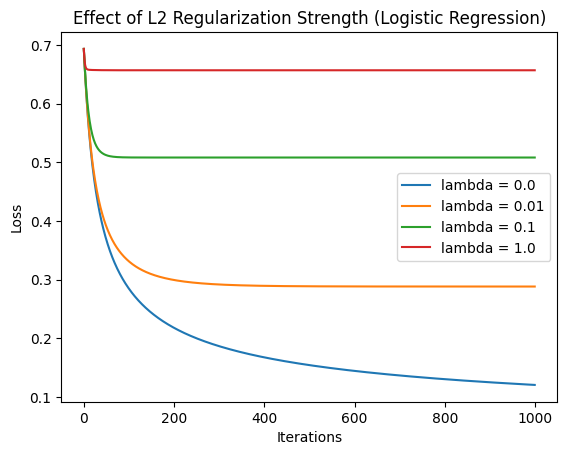

In [20]:
#different regularization strengths
lambdas = [0.0, 0.01, 0.1, 1.0]

plt.figure()

for l in lambdas:
    model = LogisticRegressionManual(
        lr=0.1,
        epochs=1000,
        l2_lambda=l
    )
    model.fit(X_scaled, y)
    plt.plot(model.losses, label=f"lambda = {l}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Effect of L2 Regularization Strength (Logistic Regression)")
plt.legend()
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [21]:
import numpy as np
from sklearn.cluster import KMeans

In [22]:

# Implement K-Means for matrix elements
def kmeans_matrix(M, k, max_iters=100):

    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    n, m = M.shape

    #flatten matrix elements
    values = M.flatten().reshape(-1, 1)   # shape: (n*m, 1)

    #run KMeans
    kmeans = KMeans(
        n_clusters=K,
        max_iter=max_iters,
        random_state=42,
        n_init=10
    )
    labels = kmeans.fit_predict(values)

    #reshape labels back to matrix form
    assignment_table = labels.reshape(n, m)

    #build cookbook
    cookbook = {k: [] for k in range(K)}
    for i in range(n):
        for j in range(m):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    # extract centroids (flatten to 1D)
    centroids = kmeans.cluster_centers_.flatten()

    return assignment_table, cookbook, centroids



In [24]:
np.random.seed(0)
M = np.random.randn(5, 5)
K = 3

assignment_table, cookbook, centroids = kmeans_matrix(M, K)

print("Matrix:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)
print("\nCookbook:")
for k, positions in cookbook.items():
    print(f"Cluster {k}: {positions}")

Matrix:
 [[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]]

Assignment Table:
 [[1 0 0 1 1]
 [2 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 2]
 [2 0 0 2 1]]

Centroids:
 [ 0.39435094  1.84843512 -1.28163211]

Cookbook:
Cluster 0: [(0, 1), (0, 2), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 2), (2, 3), (2, 4), (3, 0), (3, 2), (3, 3), (4, 1), (4, 2)]
Cluster 1: [(0, 0), (0, 3), (0, 4), (2, 1), (3, 1), (4, 4)]
Cluster 2: [(1, 0), (3, 4), (4, 0), (4, 3)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
